In [142]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb

In [143]:
df=pd.read_csv("Dataset/Housing.csv")

In [144]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [145]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [146]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [147]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['mainroad']=encoder.fit_transform(df['mainroad'])
df['guestroom']=encoder.fit_transform(df['guestroom'])
df['basement']=encoder.fit_transform(df['basement'])
df['hotwaterheating']=encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']=encoder.fit_transform(df['airconditioning'])

df['prefarea']=encoder.fit_transform(df['prefarea'])


In [148]:
X=df.iloc[:,:-1]
y=df.iloc[:,0]

In [149]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [150]:
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
treemodel=DecisionTreeClassifier()

In [155]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

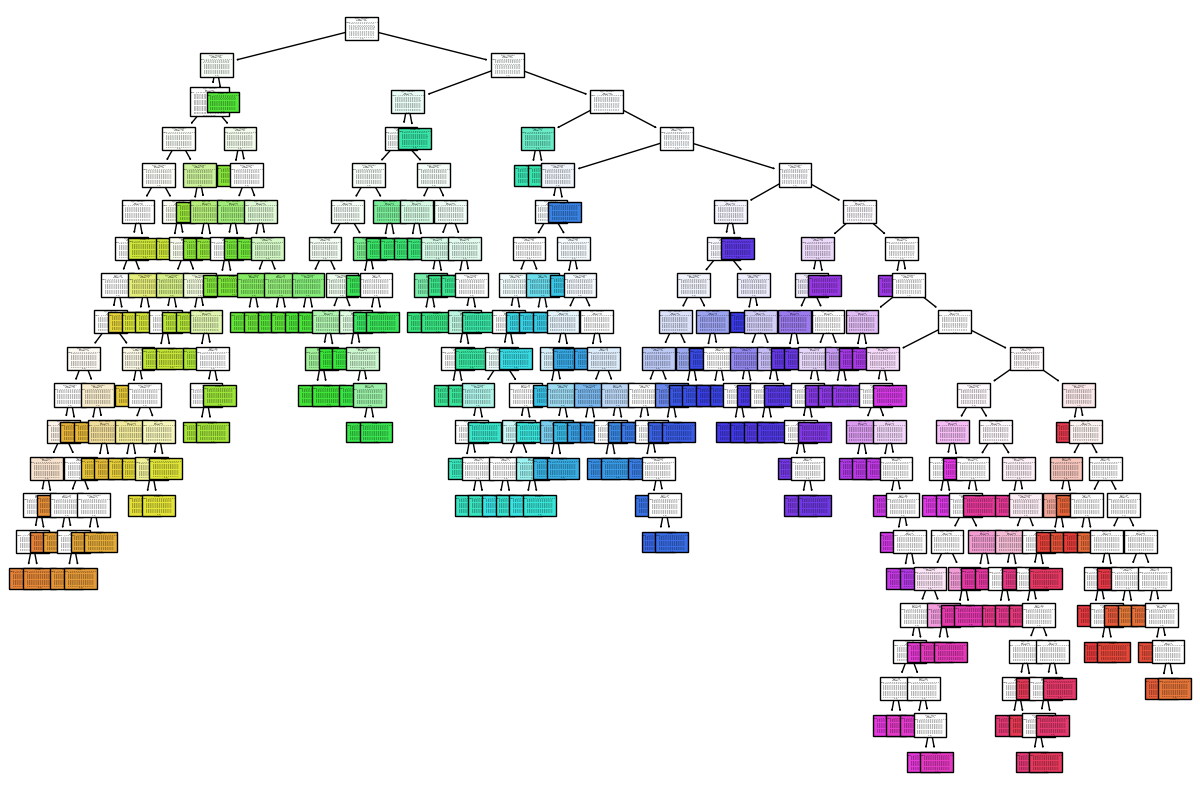

In [156]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you've already trained a decision tree model named 'treemodel'

plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)
plt.show()

In [158]:
y_pred=treemodel.predict(X_test)

In [160]:
y_pred

array([ 4060000,  6629000,  3710000,  6405000,  2730000,  4900000,
        5250000,  4543000,  2450000,  3360000,  9310000,  2660000,
        3360000,  3360000,  2310000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6629000,  5390000,  1750000,  5250000,
        4200000,  9240000,  3080000,  5110000,  8463000,  2485000,
        6629000,  3500000,  6510000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5523000,  3675000,
        6629000,  4900000,  3150000,  4480000,  6755000,  5740000,
        3010000,  1750000,  8400000,  2450000,  4235000,  4007500,
        3220000,  1855000,  8463000,  2100000,  4340000,  3010000,
        3850000,  3500000,  4760000,  3080000,  4550000,  6650000,
        6629000,  5110000,  4550000,  6629000,  3640000,  5600000,
        3780000,  6629000,  3255000,  6510000,  4690000,  4830000,
        6650000,  2653000,  7000000,  4165000,  6265000,  6629000,
        1750000,  8120000,  2660000,  4200000, 12250000,  9240

In [161]:
from sklearn.metrics import accuracy_score,classification_report

In [162]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

     1750000       0.50      0.25      0.33         4
     1767150       0.00      0.00      0.00         0
     1820000       0.00      0.00      0.00         0
     1855000       0.00      0.00      0.00         2
     1890000       0.00      0.00      0.00         0
     2100000       1.00      1.00      1.00         1
     2135000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         0
     2275000       0.00      0.00      0.00         0
     2310000       0.00      0.00      0.00         1
     2380000       1.00      0.50      0.67         2
     2408000       0.00      0.00      0.00         0
     2450000       1.00      1.00      1.00         3
     2485000       0.00      0.00      0.00         2
     2520000       0.00      0.00      0.00         0
     2653000       0.00      0.00      0.00         1
     2660000       1.00      1.00      1.00         5
     2730000       0.00    

In [163]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [164]:
from sklearn.model_selection import GridSearchCV


In [165]:
score=accuracy_score(y_pred,y_test)
print(score)

0.5487804878048781


In [166]:

cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [167]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [168]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [169]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
395    3500000
425    3360000
195    4970000
452    3150000
154    5530000
Name: price, Length: 164, dtype: int64

In [170]:
y_pred

array([ 4060000,  6629000,  3710000,  6405000,  2730000,  4900000,
        5250000,  4543000,  2450000,  3360000,  9310000,  2660000,
        3360000,  3360000,  2310000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6629000,  5390000,  1750000,  5250000,
        4200000,  9240000,  3080000,  5110000,  8463000,  2485000,
        6629000,  3500000,  6510000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5523000,  3675000,
        6629000,  4900000,  3150000,  4480000,  6755000,  5740000,
        3010000,  1750000,  8400000,  2450000,  4235000,  4007500,
        3220000,  1855000,  8463000,  2100000,  4340000,  3010000,
        3850000,  3500000,  4760000,  3080000,  4550000,  6650000,
        6629000,  5110000,  4550000,  6629000,  3640000,  5600000,
        3780000,  6629000,  3255000,  6510000,  4690000,  4830000,
        6650000,  2653000,  7000000,  4165000,  6265000,  6629000,
        1750000,  8120000,  2660000,  4200000, 12250000,  9240

In [171]:
y_pred=cv.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score, classification_report

In [173]:
score=accuracy_score(y_pred,y_test)

In [174]:
score

0.06097560975609756

In [175]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         0
     1767150       0.00      0.00      0.00         0
     1820000       0.00      0.00      0.00         0
     1855000       0.00      0.00      0.00         8
     1890000       0.00      0.00      0.00         0
     2100000       0.00      0.00      0.00         0
     2233000       0.00      0.00      0.00         0
     2275000       0.00      0.00      0.00         0
     2380000       0.00      0.00      0.00         0
     2408000       0.00      0.00      0.00         0
     2450000       0.00      0.00      0.00         0
     2520000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         0
     2800000       0.00      0.00      0.00         0
     2870000       0.00      0.00      0.00         0
     2940000       0.33      0.50      0.40         2
     3003000       0.00      0.00      0.00         0
     3010000       0.00    